<a href="https://colab.research.google.com/github/Dansouza-web/-Projeto-NBA-Data-SCIENCE-2025/blob/main/Previs%C3%A3o_Do_Campe%C3%A3o_dos_Playoffs_da_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Analise exploratória

In [2]:
df_playoffs = pd.read_csv('df_playoffs.csv')
df_playoffs.head()

,TEAM_NAME,SEASON,GP,W,L,W_PCT,MIN,PTS,REB,AST,STL,BLK,TOV,FG_PCT,FG3_PCT,FT_PCT,PLUS_MINUS,IS_CHAMPION
0,Atlanta Hawks,2013-14,7,3,4,0.429,336.0,647,275,118,46,32,95.0,0.385,0.343,0.828,-7.0,0
1,Brooklyn Nets,2013-14,12,5,7,0.417,576.0,1146,454,220,83,34,147.0,0.463,0.342,0.737,-16.0,0
2,Charlotte Bobcats,2013-14,4,0,4,0.000,192.0,368,159,79,17,18,60.0,0.449,0.365,0.713,-39.0,0
3,Chicago Bulls,2013-14,5,1,4,0.200,245.0,450,209,101,25,22,66.0,0.422,0.333,0.754,-23.0,0
4,Dallas Mavericks,2013-14,7,3,4,0.429,336.0,708,285,134,46,29,80.0,0.451,0.376,0.765,-14.0,0


In [3]:
print(df_playoffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEAM_NAME    176 non-null    object 
 1   SEASON       176 non-null    object 
 2   GP           176 non-null    int64  
 3   W            176 non-null    int64  
 4   L            176 non-null    int64  
 5   W_PCT        176 non-null    float64
 6   MIN          176 non-null    float64
 7   PTS          176 non-null    int64  
 8   REB          176 non-null    int64  
 9   AST          176 non-null    int64  
 10  STL          176 non-null    int64  
 11  BLK          176 non-null    int64  
 12  TOV          176 non-null    float64
 13  FG_PCT       176 non-null    float64
 14  FG3_PCT      176 non-null    float64
 15  FT_PCT       176 non-null    float64
 16  PLUS_MINUS   176 non-null    float64
 17  IS_CHAMPION  176 non-null    int64  
dtypes: float64(7), int64(9), object(2)
memory usage: 2

In [4]:
print(df_playoffs.describe().round())

          GP      W      L  W_PCT     MIN     PTS     REB    AST    STL  \
count  176.0  176.0  176.0  176.0   176.0   176.0   176.0  176.0  176.0   
mean    10.0    5.0    5.0    0.0   505.0  1102.0   449.0  231.0   74.0   
std      6.0    5.0    2.0    0.0   289.0   656.0   262.0  145.0   46.0   
min      4.0    0.0    1.0    0.0   192.0   324.0   130.0   63.0   17.0   
25%      5.0    1.0    4.0    0.0   244.0   558.0   226.0  113.0   36.0   
50%      8.0    4.0    4.0    0.0   394.0   858.0   371.0  182.0   57.0   
75%     14.0    7.0    6.0    1.0   702.0  1538.0   660.0  324.0  109.0   
max     24.0   16.0   10.0    1.0  1162.0  2585.0  1126.0  625.0  193.0   

         BLK    TOV  FG_PCT  FG3_PCT  FT_PCT  PLUS_MINUS  IS_CHAMPION  
count  176.0  176.0   176.0    176.0   176.0       176.0        176.0  
mean    49.0  138.0     0.0      0.0     1.0         0.0          0.0  
std     32.0   79.0     0.0      0.0     0.0        64.0          0.0  
min      7.0   42.0     0.0      0.0

In [5]:
print(df_playoffs.isnull())

     TEAM_NAME  SEASON     GP      W      L  W_PCT    MIN    PTS    REB  \
0        False   False  False  False  False  False  False  False  False   
1        False   False  False  False  False  False  False  False  False   
2        False   False  False  False  False  False  False  False  False   
3        False   False  False  False  False  False  False  False  False   
4        False   False  False  False  False  False  False  False  False   
..         ...     ...    ...    ...    ...    ...    ...    ...    ...   
171      False   False  False  False  False  False  False  False  False   
172      False   False  False  False  False  False  False  False  False   
173      False   False  False  False  False  False  False  False  False   
174      False   False  False  False  False  False  False  False  False   
175      False   False  False  False  False  False  False  False  False   

       AST    STL    BLK    TOV  FG_PCT  FG3_PCT  FT_PCT  PLUS_MINUS  \
0    False  False  False  F

In [6]:
#campeõs por temporada
print(df_playoffs[df_playoffs['IS_CHAMPION'] == 1]['SEASON'].value_counts().sort_index())


Series([], Name: count, dtype: int64)


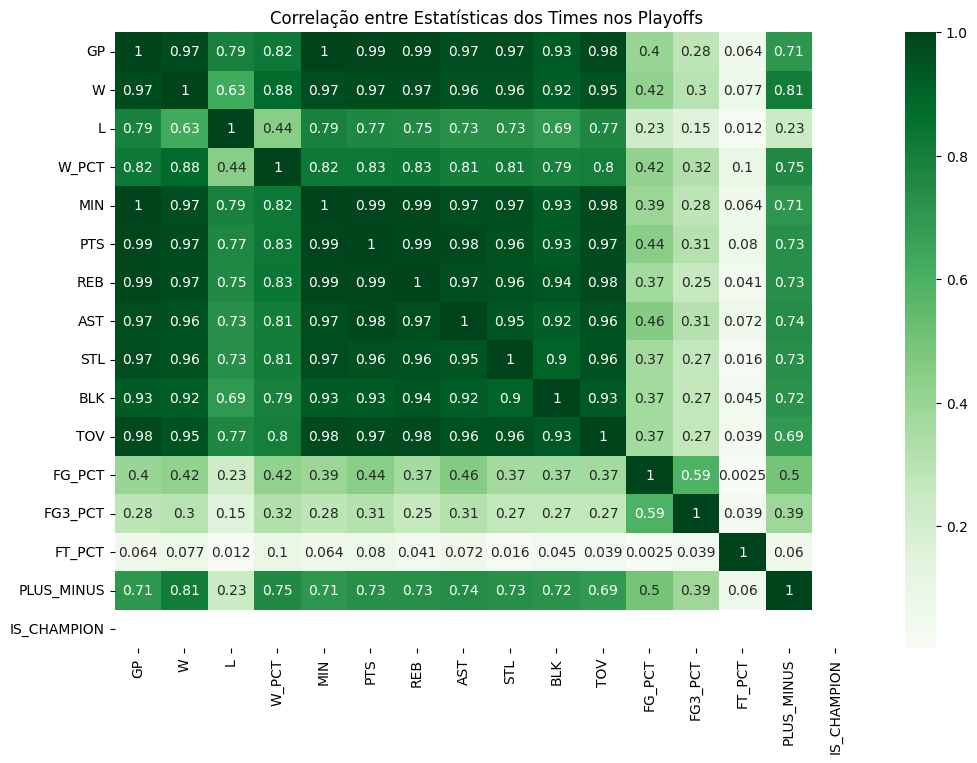

In [7]:
#Correlação de estatisticas
plt.figure(figsize=(12,8))
sns.heatmap(df_playoffs.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Correlação entre Estatísticas dos Times nos Playoffs')
plt.show()

In [8]:
#Preparando os Dados para criar o Modelo

colunas_usar = [
    'W', 'L', 'W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT',
    'REB', 'AST', 'TOV', 'STL', 'BLK', 'PLUS_MINUS'
]

X = df_playoffs[colunas_usar]
y = df_playoffs['IS_CHAMPION']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = modelo.predict(X_test)

In [11]:
print('Matriz de confusão')
print(confusion_matrix(y_test, y_pred))

Matriz de confusão
[[36]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [12]:
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [13]:

dados_finalistas_2025 = [
    {'TEAM': 'Minnesota Timberwolves', 'W': 49, 'L': 33, 'W_PCT': 0.597, 'FG_PCT': 0.484, 'FG3_PCT': 0.358,
     'FT_PCT': 0.781, 'REB': 44.1, 'AST': 24.6, 'TOV': 13.1, 'STL': 7.3, 'BLK': 5.2, 'PLUS_MINUS': 2.9},

    {'TEAM': 'New York Knicks', 'W': 51, 'L': 31, 'W_PCT': 0.622, 'FG_PCT': 0.479, 'FG3_PCT': 0.368,
     'FT_PCT': 0.795, 'REB': 44.5, 'AST': 24.3, 'TOV': 12.9, 'STL': 7.7, 'BLK': 5.1, 'PLUS_MINUS': 3.8},

    {'TEAM': 'Indiana Pacers', 'W': 50, 'L': 32, 'W_PCT': 0.602, 'FG_PCT': 0.475, 'FG3_PCT': 0.361,
     'FT_PCT': 0.792, 'REB': 44.3, 'AST': 25.1, 'TOV': 13.2, 'STL': 7.5, 'BLK': 4.5, 'PLUS_MINUS': 3.2},

    {'TEAM': 'Oklahoma City Thunder', 'W': 68, 'L': 14, 'W_PCT': 0.829, 'FG_PCT': 0.496, 'FG3_PCT': 0.365,
     'FT_PCT': 0.794, 'REB': 45.2, 'AST': 26.7, 'TOV': 12.8, 'STL':8.1, 'BLK': 4.6, 'PLUS_MINUS': 4.5}
]

df_finalistas = pd.DataFrame(dados_finalistas_2025)
df_finalistas

,TEAM,W,L,W_PCT,FG_PCT,FG3_PCT,FT_PCT,REB,AST,TOV,STL,BLK,PLUS_MINUS
0,Minnesota Timberwolves,49,33,0.597,0.484,0.358,0.781,44.1,24.6,13.1,7.3,5.2,2.9
1,New York Knicks,51,31,0.622,0.479,0.368,0.795,44.5,24.3,12.9,7.7,5.1,3.8
2,Indiana Pacers,50,32,0.602,0.475,0.361,0.792,44.3,25.1,13.2,7.5,4.5,3.2
3,Oklahoma City Thunder,68,14,0.829,0.496,0.365,0.794,45.2,26.7,12.8,8.1,4.6,4.5


In [14]:
df_finalistas['SCORE'] = (
    (df_finalistas['W_PCT'] * 100) * 2 +
    (df_finalistas['FG_PCT'] * 100) +
    (df_finalistas['FG3_PCT'] * 100) +
    (df_finalistas['FT_PCT'] * 100) +
    df_finalistas['REB'] * 1.2 +
    df_finalistas['AST'] * 1.5 +
    df_finalistas['STL'] * 2 +
    df_finalistas['BLK'] * 2 +
    df_finalistas['PLUS_MINUS'] * 3 -
    df_finalistas['TOV'] * 1.5
)


df_finalistas = df_finalistas.sort_values(by='SCORE', ascending=False)

print(df_finalistas[['TEAM', 'SCORE']])

# Campeão previsto
campeao = df_finalistas.iloc[0]['TEAM']
print(f"\n🏆 Campeão previsto da NBA 2025: {campeao}")


                     TEAM   SCORE
3   Oklahoma City Thunder  445.29
1         New York Knicks  396.10
2          Indiana Pacers  387.81
0  Minnesota Timberwolves  385.57

🏆 Campeão previsto da NBA 2025: Oklahoma City Thunder
